In [1]:
%cd ~/desktop/RNA/casp16
casp_id = "R1283v1"
pdb_dir=f"./datasets/casp16/{casp_id}/pdb"

/Users/sumishunsuke/Desktop/RNA/casp16


/Users/sumishunsuke/micromamba/envs/casp16/lib/python3.12/site-packages/IPython/core/magics/osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
/Users/sumishunsuke/micromamba/envs/casp16/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


# energy 

In [2]:
!ls {pdb_dir}/*pdb | wc -l

!python ./scripts/eval_scores.py --pdb_dir {pdb_dir} --out_dir {pdb_dir} --cpu 8

     639
['S_000668.pdb', 'S_000654.pdb', 'S_000132.pdb', 'S_000126.pdb']
Traceback (most recent call last):
  File "/Users/sumishunsuke/Desktop/RNA/casp16/./scripts/eval_scores.py", line 83, in <module>
    main()
  File "/Users/sumishunsuke/Desktop/RNA/casp16/./scripts/eval_scores.py", line 66, in main
    res_rnabriq = RNA_BRiQ.RNA_BRiQ_eval_batch(args.pdb_dir, args.out_dir, args.cpu)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/sumishunsuke/Desktop/RNA/casp16/./src/score/RNA_BRiQ.py", line 67, in RNA_BRiQ_eval_batch
    energy = float(lines[-1].strip().replace("Energy: ", ""))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'check ribose:'


In [5]:
# re-proc

all_pdb_ids = !ls {pdb_dir}/*pdb | xargs -n 1 basename | cut -d. -f1
print(len(all_pdb_ids))

energies = {}
unprocessed = []
for pdb_id in all_pdb_ids:
    f = f"{pdb_dir}/{pdb_id}.briq.out"
    try:
        with open(f) as fh: lines = fh.readlines()
        energies[f] = float(lines[-1].strip().replace("Energy: ", ""))
    except:
        unprocessed.append(pdb_id)

print(len(energies), len(unprocessed))

639
639 0


In [4]:
# import sys
# sys.path.append("./")
# from src.score import RNA_BRiQ
# from multiprocessing import Pool

# with Pool(1) as pool:
#     results = pool.map(
#         RNA_BRiQ.process_pdb_file_eval,
#         [f"{pdb_dir}/{pdb_id}.pdb" for pdb_id in unprocessed]
#         )

# enerygy書き出し

In [60]:
out_files = !ls {pdb_dir}/*briq.out

pdb_energy = {}
for out in out_files:
    with open(out) as fh: 
        lines = fh.readlines()
    energies = float(lines[-1].strip().replace("Energy: ", ""))
    basename = out.split("/")[-1].replace(".briq.out", "")
    pdb_energy[basename] = energies


pdb_energy["S_000001"]

import pandas as pd
df_briq = pd.DataFrame(pdb_energy.items(), columns=["pdb", "BRiQscore"])
print(df_briq.columns)
print(df_briq.shape)
print(df_briq.head(3))

Index(['pdb', 'BRiQscore'], dtype='object')
(639, 2)
        pdb  BRiQscore
0  S_000001   -97.3341
1  S_000002   -50.7243
2  S_000003   -39.5583


In [63]:
import pandas as pd 
df_farfar = pd.read_csv(f"{pdb_dir}/FARFAR2_scores.tsv", sep="\t")
# df_farfar = df_farfar[["score", "description"]]
df_farfar.columns = [c.strip() for c in df_farfar.columns]
df_farfar = df_farfar[["score", "description"]]
df_farfar.columns = ["FARFARscore", "pdb"]
print(df_farfar.columns)
print(df_farfar.shape)
print(df_farfar.head(3))

df_briq['pdb'] = df_briq['pdb'].str.strip().str.upper()
df_farfar['pdb'] = df_farfar['pdb'].str.strip().str.upper()
df = pd.merge(df_briq, df_farfar, on="pdb")
print(df.head(3))
df.to_csv(f"{pdb_dir}/{casp_id}_scores.csv", index=False)

Index(['FARFARscore', 'pdb'], dtype='object')
(639, 2)
   FARFARscore           pdb
0      337.937      S_000185
1        5.805      S_000514
2      -91.397      S_000058
        pdb  BRiQscore  FARFARscore
0  S_000001   -97.3341      489.355
1  S_000002   -50.7243     -263.422
2  S_000003   -39.5583     -351.416


# 距離計算

In [6]:
pdb_dir

'./datasets/casp16/R1283v1/pdb'

In [7]:
!time python scripts/calc_rmsd.py --pdb_dir {pdb_dir} --cpu 8

['S_000001.pdb', 'S_000002.pdb', 'S_000003.pdb', 'S_000004.pdb', 'S_000005.pdb']
Number of pdb files: 639
Calculating RMSD matrix 639x639 using 8 cpus
Calculating RMSD for 0th pdb file
Calculating RMSD for 80th pdb file
Calculating RMSD for 70th pdb file
Calculating RMSD for 60th pdb file
Calculating RMSD for 50th pdb file
Calculating RMSD for 40th pdb file
Calculating RMSD for 30th pdb file
Calculating RMSD for 20th pdb file
Calculating RMSD for 10th pdb file
Calculating RMSD for 160th pdb file
Calculating RMSD for 110th pdb file
Calculating RMSD for 100th pdb file
Calculating RMSD for 150th pdb file
Calculating RMSD for 90th pdb file
Calculating RMSD for 140th pdb file
Calculating RMSD for 180th pdb file
Calculating RMSD for 130th pdb file
Calculating RMSD for 170th pdb file
Calculating RMSD for 120th pdb file
Calculating RMSD for 300th pdb file
Calculating RMSD for 250th pdb file
Calculating RMSD for 190th pdb file
Calculating RMSD for 220th pdb file
Calculating RMSD for 270th pdb f

/Users/sumishunsuke/micromamba/envs/casp16/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/sumishunsuke/micromamba/envs/casp16/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/Users/sumishunsuke/micromamba/envs/casp16/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/sumishunsuke/micromamba/envs/casp16/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


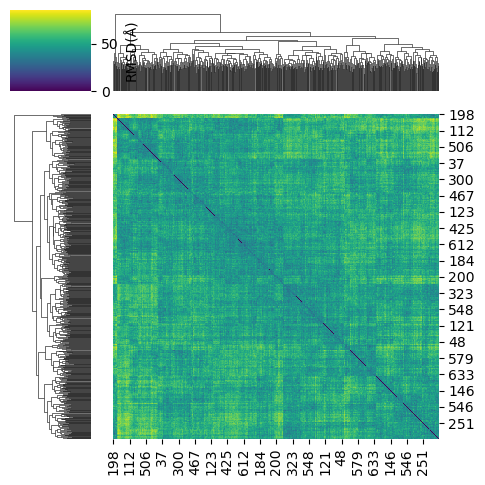

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

rmsd = np.load(f"{pdb_dir}/rmsd_matrix_sorted_id.npy")
g = sns.clustermap(rmsd, cmap="viridis", figsize=(5,5), cbar_kws={'label': 'RMSD(Å)', 'aspect': 20})
plt.tight_layout()
plt.savefig(f"{pdb_dir}/rmsd_clustermap.png", dpi = 300)

In [10]:
import pandas as pd 
df_rmsd = pd.DataFrame(rmsd, columns=all_pdb_ids, index=all_pdb_ids)
df_rmsd.to_csv(f"{pdb_dir}/rmsd_matrix_sorted_id.csv")

# clustering

In [11]:
import numpy as np
from sklearn.manifold import MDS

rmsd = np.load(f"{pdb_dir}/rmsd_matrix_sorted_id.npy")
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42, n_jobs=7, max_iter=1000)
coords = mds.fit_transform(rmsd)

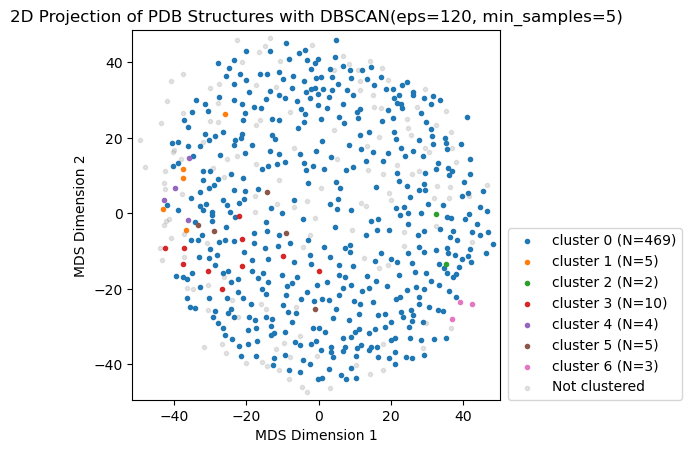

In [16]:
from sklearn.cluster import DBSCAN
eps =  120
min_samples = 5
clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(rmsd)

plt.figure()
for c in set(clustering.labels_):
    if c == -1: 
        plt.scatter(coords[clustering.labels_ == c, 0], coords[clustering.labels_ == c, 1], label="Not clustered", marker=".", alpha=0.2)
    else:
        n = sum(clustering.labels_ == c)
        plt.scatter(coords[clustering.labels_ == c, 0], coords[clustering.labels_ == c, 1], label=f"cluster {c} (N={n})", marker=".")
plt.legend(loc = (1.02,0))
plt.xlim(min(coords[:, 0])-2, max(coords[:, 0])+2)
plt.ylim(min(coords[:, 1])-2, max(coords[:, 1])+2)

# plt.colorbar(label=label)
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title(f'2D Projection of PDB Structures with DBSCAN(eps={eps}, min_samples={min_samples})')
plt.subplots_adjust(right=0.7)
plt.savefig(f"{pdb_dir}/rmsd_mds_dbscan_eps{eps}_min_samples{min_samples}.png", dpi=300)
plt.show()


In [52]:
import os 
import pandas as pd

df_scores = pd.read_csv(f"{pdb_dir}/{casp_id}_scores.csv")
print(df_scores.head(2))
top_pdbs = !ls {pdb_dir}/*.pdb
print(len(top_pdbs))
top_pdbs = [os.path.basename(pdb).replace(".pdb", "") for pdb in top_pdbs]
df_scores = df_scores[df_scores["pdb"].isin(top_pdbs)]
df_scores

Empty DataFrame
Columns: [pdb, BRiQscore, FARFARscore]
Index: []
639


,pdb,BRiQscore,FARFARscore


In [51]:
df_scores

,pdb,BRiQscore,FARFARscore


In [65]:

df_scores = pd.read_csv(f"{pdb_dir}/{casp_id}_scores.csv")

pdb_list = []

print(" Sorted by BRiQscore")
print(df_scores.sort_values("BRiQscore").head(10))
pdb_list.extend(df_scores.sort_values("BRiQscore").head(5)["pdb"].values)
print(" Sorted by FARFARscore")
print(df_scores.sort_values("FARFARscore").head(10))
pdb_list.extend(df_scores.sort_values("FARFARscore").head(5)["pdb"].values)
print("**"*20)



 Sorted by BRiQscore
          pdb  BRiQscore  FARFARscore
57   S_000058   -422.728      -91.397
16   S_000017   -366.304     -431.097
469  S_000472   -347.447     -265.381
74   S_000075   -324.795     -318.868
603  S_000637   -306.263     -299.935
329  S_000330   -304.578     -227.767
146  S_000147   -302.562     -332.041
360  S_000361   -299.839     -233.520
422  S_000423   -299.448     -309.377
207  S_000208   -297.838       63.707
 Sorted by FARFARscore
          pdb  BRiQscore  FARFARscore
500  S_000503   -170.522     -462.858
16   S_000017   -366.304     -431.097
71   S_000072   -289.934     -425.529
234  S_000235   -229.511     -414.755
209  S_000210   -167.574     -407.821
216  S_000217   -200.974     -406.852
345  S_000346   -194.097     -390.665
239  S_000240   -229.946     -387.700
549  S_000555   -181.152     -382.745
388  S_000389   -172.068     -379.041
****************************************
